# Word Clouds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import spacy

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = stopwords.words('english')

In [4]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [5]:
# def top_words(text, title):
#     # Preprocess the text
#     tokens = preprocess_text(text)
    
#     # Find the top 10 most used words
#     word_counts = Counter(tokens)
#     most_common_words = word_counts.most_common(20)
    
#     # Print the top 10 words
#     print(f"Top 10 words:")
#     for word, count in most_common_words:
#         print(f"{word}: {count}")
    
#     # Generate word cloud
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    
#     # Plot word cloud
#     plt.figure(figsize=(16, 8))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title, fontsize=18)
#     plt.axis('off')
#     plt.show()

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

def top_words(text, title):
    # Preprocess the text
    tokens = preprocess_text(text)
    
    # Find the top 20 most used words
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(20)
    
    # Print the top 10 words
    print("Top 20 words:")
    for word, count in most_common_words[:20]:
        print(f"{word}: {count}")
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    
    # Plot word cloud
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)  # Creating a 1x2 subplot layout, select the 1st position for word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    
    # Plot bar chart for top 20 words
    words, counts = zip(*most_common_words)
    plt.subplot(1, 2, 2)  # Select the 2nd position for the bar plot
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Most Common Words', fontsize=18)
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()  # Adjust layout to fit both plots

    # Show both plots
    plt.show()


In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
def separate_proper_nouns_concepts(text):
    doc = nlp(text)
    proper_nouns = []
    other_concepts = []
    
    for token in doc:
        if token.ent_type_ in ["PERSON", "ORG", "GPE", "LOC"]:  # Proper nouns (names, places, organizations)
            proper_nouns.append(token.text)
        elif not token.is_stop and not token.is_punct and not token.ent_type_:
            other_concepts.append(token.text)
    
    return proper_nouns, other_concepts

In [8]:
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

In [9]:
import nltk
import pandas as pd
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define custom old English stopwords
old_english_stopwords = {
    'thy', 'thou', 'thee', 'ye', 'thyself', 'thine', 'art', 'dost', 
    'hast', 'hast', 'wilt', 'shall', 'o', 'lo', 'say', 'come', 'unto'
}

# Define words to keep even if they have length 3 or less
keep_words = {'day', 'man', 'god'}  # Add any other important short words here

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []  # If the text is not a string (NaN, float), return an empty list

    # Tokenize the text and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Combine modern and old English stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(old_english_stopwords)

    # Remove stopwords, single-letter words, and non-alphabetical tokens
    # Also remove words with length <= 3, except those in keep_words
    tokens = [
        word for word in tokens 
        if word.isalpha() and 
        word not in stop_words and 
        (len(word) > 3 or word in keep_words)
    ]

    # Lemmatize using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    return lemmatized_tokens

# Load datasets
df_bible = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Bible.csv')
df_gita = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Gita.csv')
df_quran = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Quran.csv')

# Apply preprocessing to the 'Text' columns (checking column existence before processing)
if 'Text' in df_gita.columns:
    df_gita['processed'] = df_gita['Text'].apply(lambda x: " ".join(preprocess_text(x)))

if 't' in df_bible.columns:
    df_bible['processed'] = df_bible['t'].apply(lambda x: " ".join(preprocess_text(x)))

if 'Verse' in df_quran.columns:
    df_quran['processed'] = df_quran['Verse'].apply(lambda x: " ".join(preprocess_text(x)))

# Replace NaN values with empty string in the processed columns
df_gita['processed'].fillna("", inplace=True)
df_bible['processed'].fillna("", inplace=True)
df_quran['processed'].fillna("", inplace=True)

# Optionally, display a sample of the processed data
print(df_gita['processed'].head())
print(df_bible['processed'].head())
print(df_quran['processed'].head())


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
0    dhritarashtra sanjaya tell happen kurukshetra ...
1    sanjaya survey force pandava array battle prin...
2    teacher look mighty army pandavas assemble gif...
3    heroic warrior great archer equal bhima arjuna...
4    dhrishtaketu chekitana valiant king kashi puru...
Name: processed, dtype: object
0                          first god make heaven earth
1    earth waste without form dark face deep spirit...
2                                  god say light light
3     god look light good god make division light dark
4    name light day dark night evening mo

/tmp/ipykernel_30/963309870.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gita['processed'].fillna("", inplace=True)
/tmp/ipykernel_30/963309870.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [10]:
# import nltk
# import pandas as pd
# import spacy
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Define custom old English stopwords
# old_english_stopwords = {'thy', 'thou', 'thee', 'ye', 'thyself', 'thine', 'art', 'dost', 'hast', 'hast', 'wilt', 'shall', 'o','lo','say','come','unto'}

# # Preprocessing function
# def preprocess_text(text):
#     if not isinstance(text, str):
#         return []  # If the text is not a string (NaN, float), return empty list

#     # Tokenize the text and convert to lowercase
#     tokens = word_tokenize(text.lower())

#     # Combine modern and old English stopwords
#     stop_words = set(stopwords.words('english'))
#     stop_words.update(old_english_stopwords)

#     # Remove stopwords, single letter words, and non-alphabetical tokens
#     tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 1]

#     # Lemmatize using spaCy
#     doc = nlp(" ".join(tokens))
#     lemmatized_tokens = [token.lemma_ for token in doc]

#     return lemmatized_tokens

# # Load datasets
# df_bible = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Bible.csv')
# df_gita = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Gita.csv')
# df_quran = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Quran.csv')

# # Apply preprocessing to the 'Text' columns (checking column existence before processing)
# if 'Text' in df_gita.columns:
#     df_gita['processed'] = df_gita['Text'].apply(lambda x: " ".join(preprocess_text(x)))

# if 't' in df_bible.columns:
#     df_bible['processed'] = df_bible['t'].apply(lambda x: " ".join(preprocess_text(x)))

# if 'Verse' in df_quran.columns:
#     df_quran['processed'] = df_quran['Verse'].apply(lambda x: " ".join(preprocess_text(x)))

# # Replace NaN values with empty string in the processed columns
# df_gita['processed'].fillna("", inplace=True)
# df_bible['processed'].fillna("", inplace=True)
# df_quran['processed'].fillna("", inplace=True)

# # Optionally, display a sample of the processed data
# print(df_gita['processed'].head())
# print(df_bible['processed'].head())
# print(df_quran['processed'].head())


In [11]:
df_gita.head()

,Chapter,Verse,Text,processed
0,1,1,"DHRITARASHTRA: O Sanjaya, tell me what happen...",dhritarashtra sanjaya tell happen kurukshetra ...
1,1,2,SANJAYA: Having surveyed the forces of the Pa...,sanjaya survey force pandava array battle prin...
2,1,3,"O my teacher, look at this mighty army of the ...",teacher look mighty army pandavas assemble gif...
3,1,4,There are heroic warriors and great archers wh...,heroic warrior great archer equal bhima arjuna...
4,1,5,"Dhrishtaketu, Chekitana, the valiant king of K...",dhrishtaketu chekitana valiant king kashi puru...


In [12]:
df_quran.head()

,Name,Surah,Ayat,Verse,processed
0,The Opening,1,1,"In the name of Allah, the Beneficent, the Merc...",name allah beneficent merciful
1,The Opening,1,2,"Praise be to Allah, Lord of the Worlds,",praise allah lord worlds
2,The Opening,1,3,"The Beneficent, the Merciful.",beneficent merciful
3,The Opening,1,4,"Owner of the Day of Judgment,",owner day judgment
4,The Opening,1,5,Thee (alone) we worship; Thee (alone) we ask f...,alone worship alone help


In [13]:
df_bible.head()

,b,c,v,t,processed
0,1,1,1,At the first God made the heaven and the earth.,first god make heaven earth
1,1,1,2,And the earth was waste and without form; and ...,earth waste without form dark face deep spirit...
2,1,1,3,"And God said, Let there be light: and there wa...",god say light light
3,1,1,4,"And God, looking on the light, saw that it was...",god look light good god make division light dark
4,1,1,5,"Naming the light, Day, and the dark, Night. An...",name light day dark night evening morning firs...


In [14]:
# Save the processed DataFrames to CSV files
df_gita.to_csv('/kaggle/working/processed_Gita.csv', index=False)
df_bible.to_csv('/kaggle/working/processed_Bible.csv', index=False)
df_quran.to_csv('/kaggle/working/processed_Quran.csv', index=False)


## BHAGWAD GITA

In [15]:
import pandas as pd
gita_data = pd.read_csv("/kaggle/working/processed_Gita.csv")
bhagwad_gita_text = ' '.join(gita_data['processed'].tolist())

Top 20 words:
arjuna: 119
action: 80
krishna: 68
mind: 63
sense: 60
self: 60
attain: 58
supreme: 54
desire: 53
creature: 51
every: 48
path: 47
know: 46
free: 46
among: 45
life: 44
world: 44
wisdom: 44
lord: 42
without: 42


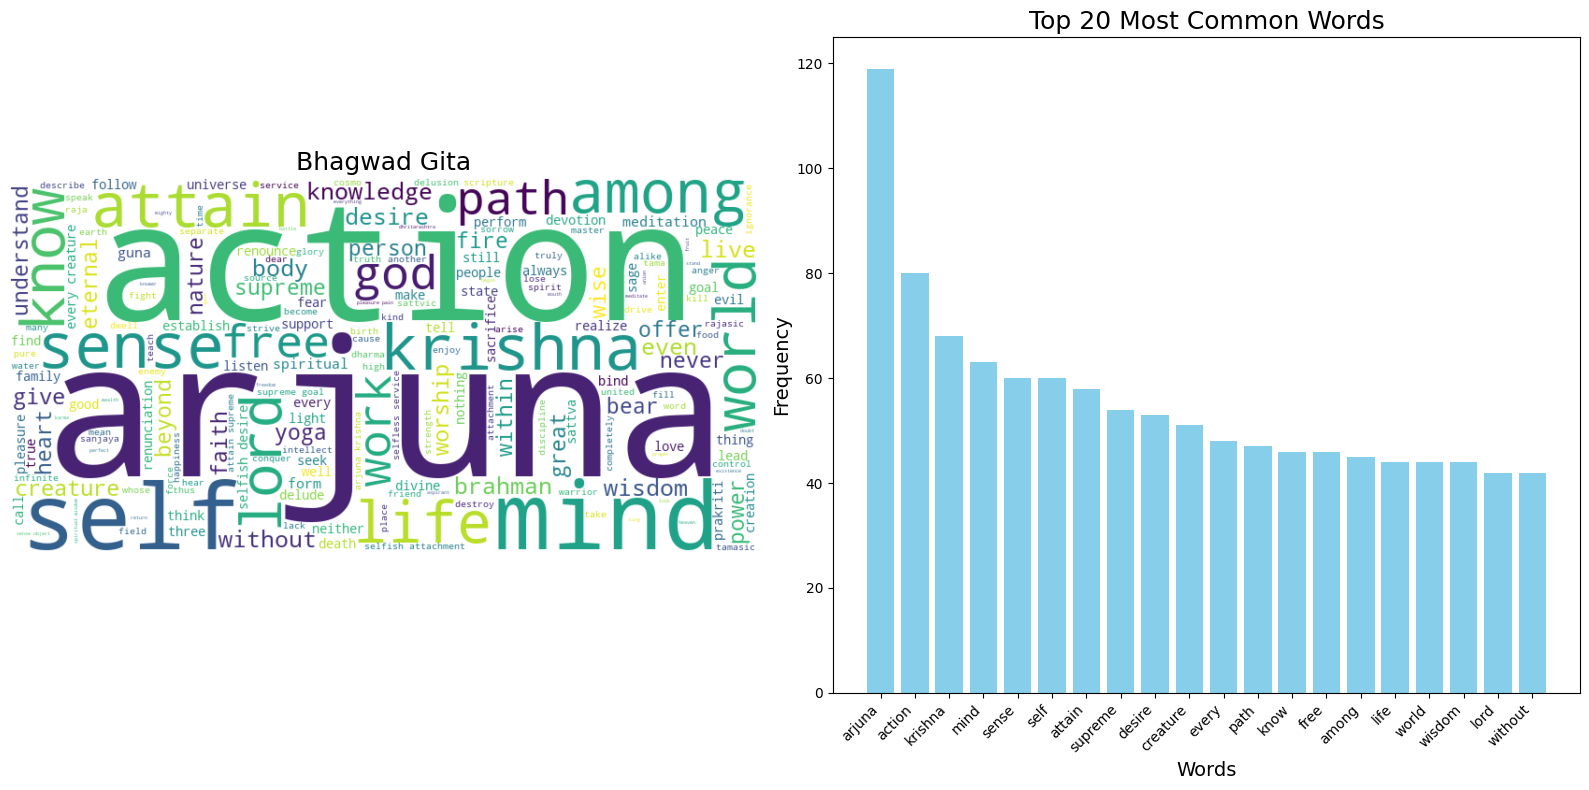

In [16]:
top_words(bhagwad_gita_text, "Bhagwad Gita")

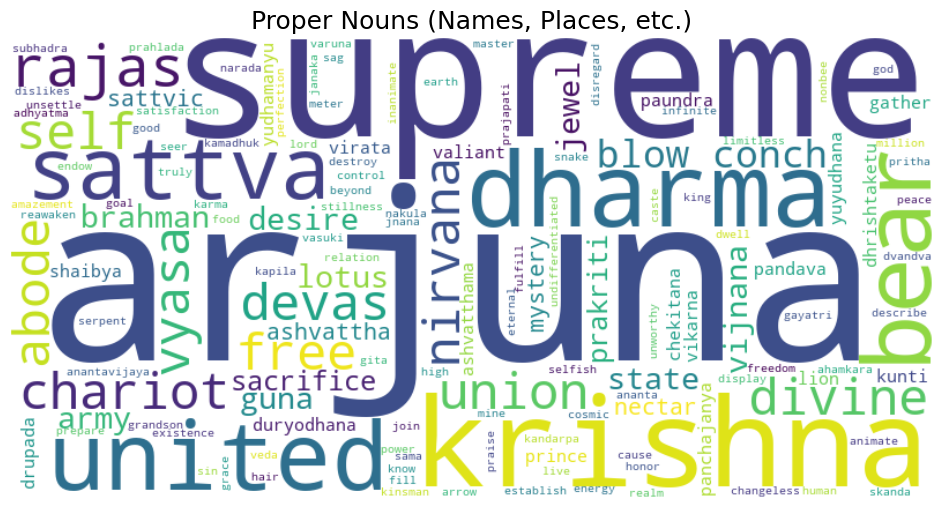

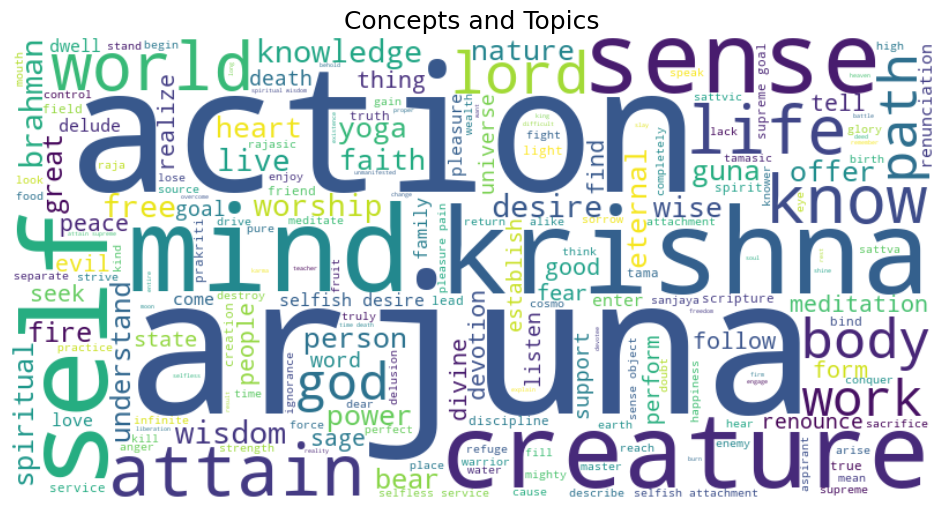

In [17]:
proper_nouns, other_concepts = separate_proper_nouns_concepts(bhagwad_gita_text)
generate_wordcloud(proper_nouns, "Proper Nouns (Names, Places, etc.)")
generate_wordcloud(other_concepts, "Concepts and Topics")

## BIBLE

In [18]:
import pandas as pd

# Read the data
bible_data = pd.read_csv('/kaggle/working/processed_Bible.csv')

# Replace NaN values in the 'processed' column with an empty string and ensure all entries are strings
bible_data['processed'] = bible_data['processed'].fillna('').astype(str)

# Join the text from the 'processed' column
bible_text = ' '.join(bible_data['processed'].tolist())

# Optionally, print the result to check
print(bible_text[:500])  # Print the first 500 characters of the joined text

first god make heaven earth earth waste without form dark face deep spirit god move face water god say light light god look light good god make division light dark name light day dark night evening morning first day god say solid arch stretching water part water water god make arch division water arch god give arch name heaven evening morning second day god say water heaven together place land see god give land name earth water together place name sea god good god say grass earth plant produce s


Top 20 words:
give: 8847
lord: 7887
make: 7126
take: 6001
god: 4558
king: 3079
man: 3055
people: 2779
israel: 2541
day: 2341
land: 2311
word: 2153
send: 2142
place: 2128
keep: 2042
house: 1931
child: 1929
away: 1890
great: 1749
father: 1745


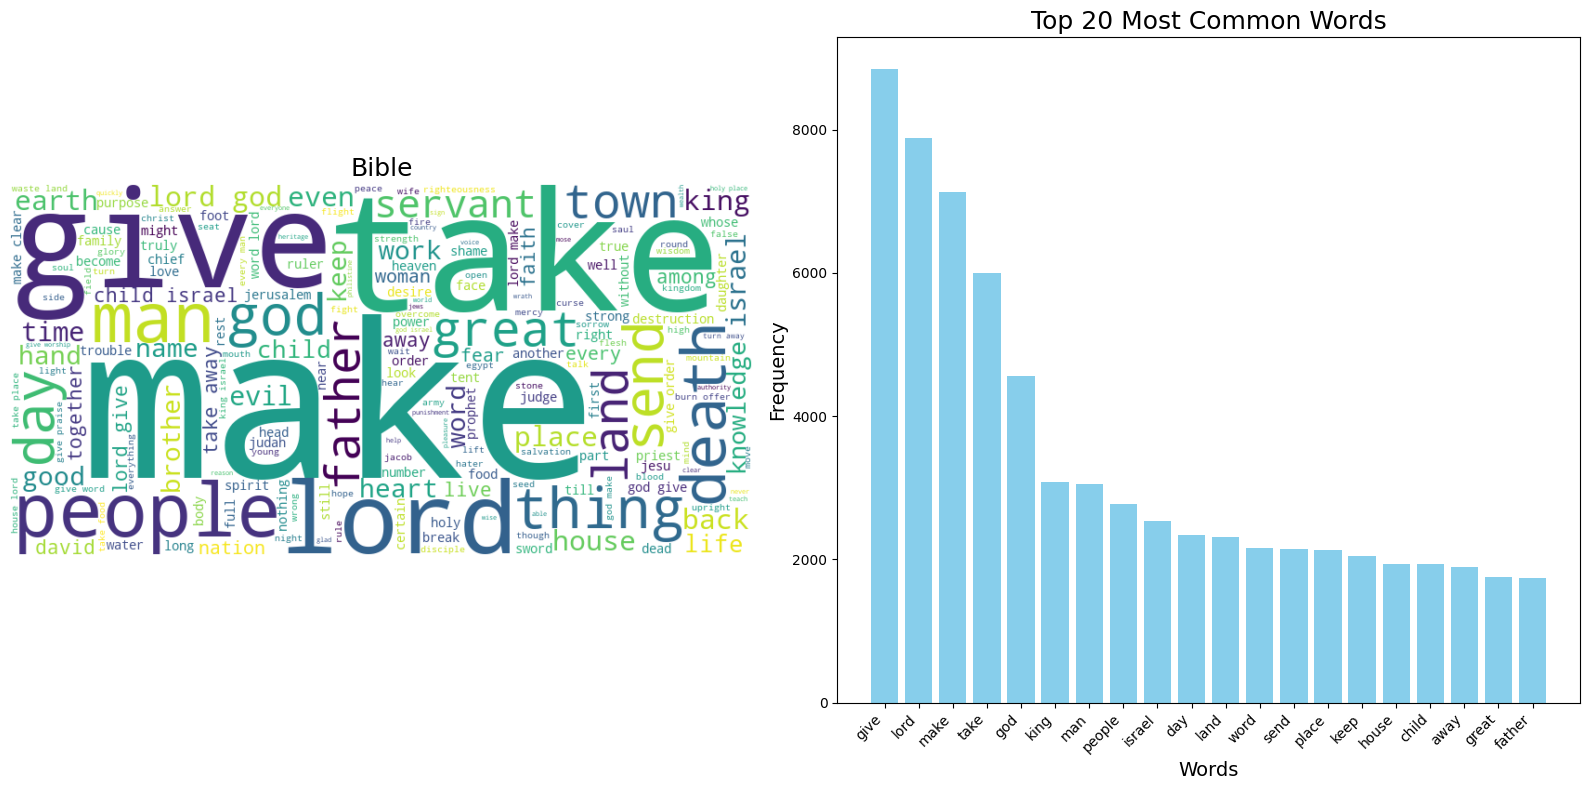

In [19]:
# Increase SpaCy's max_length limit
nlp.max_length = 2000000  # Set this to a value that fits your text length

# Now you can call the top_words function without hitting the length limit
top_words(bible_text, "Bible")


## QURAN

In [20]:
import pandas as pd

# Read the data
quran_data = pd.read_csv('/kaggle/working/processed_Quran.csv')

# Replace NaN values in the 'processed' column with an empty string and ensure all entries are strings
quran_data['processed'] = quran_data['processed'].fillna('').astype(str)

# Join the text from the 'processed' column
quran_text = ' '.join(quran_data['processed'].tolist())

# Optionally, print the result to check
print(quran_text[:500])  # Print the first 500 characters of the joined text

name allah beneficent merciful praise allah lord worlds beneficent merciful owner day judgment alone worship alone help show straight path path favour path earn anger astray alif scripture whereof doubt guidance ward evil believe unseen establish worship spend bestow upon believe reveal muhammad reveal certain hereafter depend guidance lord successful disbeliever whether warn warn believe allah hath seal hear heart eye cover awful doom mankind believe allah last day believe think beguile allah b


Top 20 words:
allah: 2833
lord: 1014
hath: 780
day: 551
believe: 525
make: 525
give: 438
earth: 395
good: 381
save: 371
verily: 364
messenger: 361
know: 336
folk: 295
upon: 284
bring: 281
muhammad: 277
would: 266
disbelieve: 263
people: 256


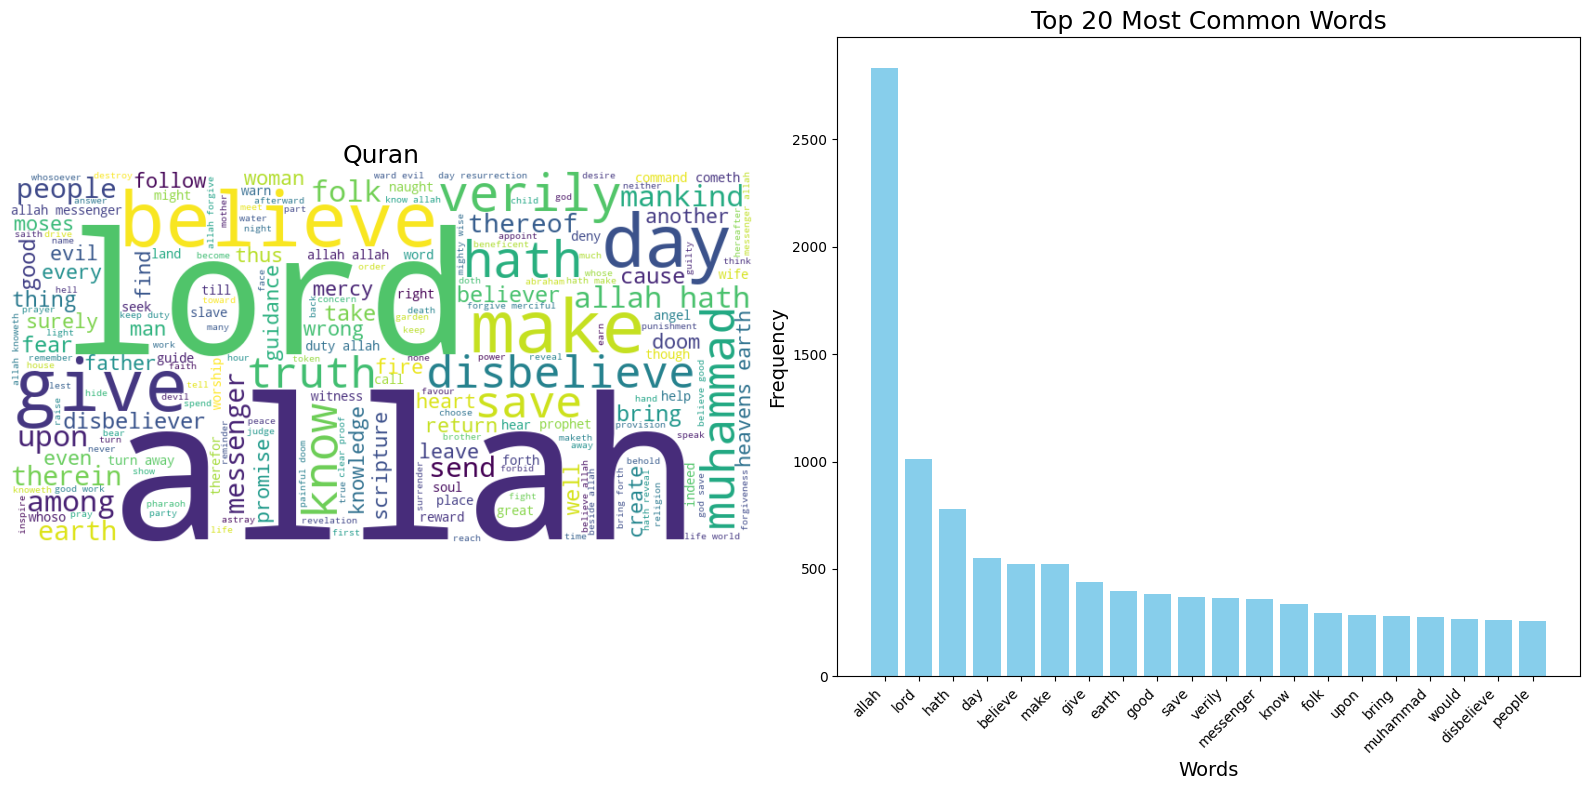

In [21]:
top_words(quran_text, "Quran")

# TOPIC MODELLING

## GITA

In [24]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# Load the cleaned data
data = pd.read_csv('/kaggle/working/processed_Gita.csv')

# Preprocess the text data
data['processed'] = data['processed'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(data['processed'])
corpus = [dictionary.doc2bow(text) for text in data['processed']]

# Train LDA Model
num_topics = 10
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics with their keywords
print("Topics and their Keywords:")
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Get topics with their associated words in a nested list format
topics_words = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
nested_topics_gita = []
for topic in topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_gita.append(topic_words)

# Display the nested list of words in each topic
print("\nNested List of Words in Each Topic:")
for i, topic_words in enumerate(nested_topics_gita):
    print(f"Topic {i+1}: {topic_words}")
# Get topic distributions for each verse (document)
topic_distributions = lda_model[corpus]

# Convert topic distributions to a DataFrame
topic_contributions = []
for i, doc_topics in enumerate(topic_distributions):
    topics_contrib = np.zeros(lda_model.num_topics)
    for topic_id, contrib in doc_topics:
        topics_contrib[topic_id] = contrib
    topic_contributions.append(topics_contrib)

# Create DataFrame with verse index and topic contributions
topic_df = pd.DataFrame(topic_contributions, columns=[f'Topic_{i}' for i in range(lda_model.num_topics)])
data_with_topics = pd.concat([data[['Chapter', 'Verse', 'Text']], topic_df], axis=1)

# Print top 5 verses contributing to each topic
for i in range(num_topics):
    print(f"\n-------- Top Verses Contributing to Topic {i + 1} ---------")
    data_with_topics['Topic_Contribution'] = data_with_topics[f'Topic_{i}']
    
    # Sort verses by their contribution to the given topic
    ranked_verses = data_with_topics.sort_values(by='Topic_Contribution', ascending=False)

    # Display top 5 verses contributing to the current topic
    print(ranked_verses[['Chapter', 'Verse', 'Text', 'Topic_Contribution']].head())


Topics and their Keywords:
(0, '0.029*"arjuna" + 0.017*"mind" + 0.013*"world" + 0.011*"krishna" + 0.009*"great" + 0.009*"attain" + 0.009*"self" + 0.008*"work" + 0.007*"thus" + 0.007*"body"')
(1, '0.032*"action" + 0.018*"worship" + 0.016*"among" + 0.012*"path" + 0.011*"self" + 0.011*"know" + 0.009*"attachment" + 0.009*"yoga" + 0.009*"wisdom" + 0.008*"desire"')
(2, '0.031*"sense" + 0.030*"mind" + 0.017*"without" + 0.016*"free" + 0.011*"even" + 0.010*"good" + 0.010*"meditation" + 0.009*"offer" + 0.009*"action" + 0.008*"evil"')
(3, '0.019*"arjuna" + 0.016*"attain" + 0.014*"brahman" + 0.013*"desire" + 0.011*"path" + 0.011*"knowledge" + 0.011*"krishna" + 0.009*"time" + 0.009*"remember" + 0.009*"pleasure"')
(4, '0.023*"arjuna" + 0.017*"among" + 0.016*"krishna" + 0.014*"path" + 0.013*"time" + 0.013*"death" + 0.012*"seek" + 0.010*"god" + 0.008*"know" + 0.008*"life"')
(5, '0.013*"life" + 0.012*"arjuna" + 0.011*"spiritual" + 0.011*"even" + 0.010*"wisdom" + 0.009*"free" + 0.008*"offer" + 0.008*"ev

In [25]:
# import pandas as pd
# import gensim
# from gensim import corpora
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Load the cleaned data
# data=pd.read_csv("/kaggle/working/processed_Gita.csv")

# data['processed'] = data['processed'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])

# # Create Dictionary
# dictionary = corpora.Dictionary(data['processed'])

# # Create Corpus: Term Document Frequency
# corpus = [dictionary.doc2bow(text) for text in data['processed']]

# # LDA Model
# lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# # Print the topics with their keywords
# topics = lda_model.print_topics(num_words=10)
# for topic in topics:
#     print(topic)


In [26]:
!pip install pyLDAvis


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 43.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tsfresh 0.20.3 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [27]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
#


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already b

In [28]:
# Save visualization to an HTML file
pyLDAvis.save_html(vis, 'lda_gita_visualization.html')

print("Visualization saved as 'lda_gita_visualization.html'.")

Visualization saved as 'lda_gita_visualization.html'.


### Ranking Verses Contribution to topics

In [29]:
# import pandas as pd
# import gensim
# from gensim import corpora
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import numpy as np

# # Load the cleaned data
# data = pd.read_csv('/kaggle/working/processed_Gita.csv')
# data['processed'] = data['Text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])

# # Create Dictionary and Corpus
# dictionary = corpora.Dictionary(data['processed'])
# corpus = [dictionary.doc2bow(text) for text in data['processed']]

# # LDA Model
# lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# # Get topic distributions for each verse (document)
# topic_distributions = lda_model[corpus]

# # Convert topic distributions to a more accessible format (DataFrame)
# topic_contributions = []
# for i, doc_topics in enumerate(topic_distributions):
#     # doc_topics is a list of tuples (topic_id, contribution)
#     topics_contrib = np.zeros(lda_model.num_topics)
#     for topic_id, contrib in doc_topics:
#         topics_contrib[topic_id] = contrib
#     topic_contributions.append(topics_contrib)

# # Create DataFrame with verse index and topic contributions
# topic_df = pd.DataFrame(topic_contributions, columns=[f'Topic_{i}' for i in range(lda_model.num_topics)])
# data_with_topics = pd.concat([data[['Chapter', 'Verse', 'Text']], topic_df], axis=1)
# for i in range(0,10):
#     print("--------Topic ",i+1,"---------")
#     # Example: Rank verses by their contribution to Topic 0
#     topic_id = i  # You can change this to any topic
#     data_with_topics['Topic_Contribution'] = data_with_topics[f'Topic_{topic_id}']

#     # Sort verses by their contribution to the given topic
#     ranked_verses = data_with_topics.sort_values(by='Topic_Contribution', ascending=False)

#     # Display top 5 verses contributing to Topic 0
#     print(ranked_verses[['Chapter', 'Verse', 'Text', 'Topic_Contribution']].head())


### Collecting topics into a list

In [30]:
# Get topics with their associated words
topics_words = lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic
nested_topics_gita = []
for topic in topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_gita.append(topic_words)

# Display the nested list of words in each topic
for i, topic_words in enumerate(nested_topics_gita):
    print(f"Topic {i+1}: {topic_words}")


Topic 1: ['arjuna', 'mind', 'world', 'krishna', 'great', 'attain', 'self', 'work', 'thus', 'body']
Topic 2: ['action', 'worship', 'among', 'path', 'self', 'know', 'attachment', 'yoga', 'wisdom', 'desire']
Topic 3: ['sense', 'mind', 'without', 'free', 'even', 'good', 'meditation', 'offer', 'action', 'evil']
Topic 4: ['arjuna', 'attain', 'brahman', 'desire', 'path', 'knowledge', 'krishna', 'time', 'remember', 'pleasure']
Topic 5: ['arjuna', 'among', 'krishna', 'path', 'time', 'death', 'seek', 'god', 'know', 'life']
Topic 6: ['life', 'arjuna', 'spiritual', 'even', 'wisdom', 'free', 'offer', 'every', 'action', 'god']
Topic 7: ['arjuna', 'world', 'among', 'creature', 'three', 'krishna', 'describe', 'listen', 'divine', 'every']
Topic 8: ['arjuna', 'supreme', 'creature', 'krishna', 'goal', 'attain', 'lord', 'self', 'wise', 'action']
Topic 9: ['supreme', 'self', 'within', 'lord', 'without', 'desire', 'free', 'selfish', 'attachment', 'knowledge']
Topic 10: ['every', 'selfless', 'body', 'give', 

## BIBLE

In [31]:
# # Load the Bible dataset
# bible_data = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Bible.csv')

# # Preprocessing: Tokenization and Stopword Removal for Bible dataset
# bible_data['processed_text'] = bible_data['t'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

bible_data=df_bible
bible_data['processed'] = bible_data['processed'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])

# Create Dictionary for Bible dataset
bible_dictionary = corpora.Dictionary(bible_data['processed'])

# Create Corpus: Term Document Frequency for Bible dataset
bible_corpus = [bible_dictionary.doc2bow(text) for text in bible_data['processed']]

# LDA Model for Bible dataset
bible_lda_model = gensim.models.LdaModel(bible_corpus, num_topics=10, id2word=bible_dictionary, passes=10)

# Print the topics with their keywords
bible_topics = bible_lda_model.print_topics(num_words=10)
for topic in bible_topics:
    print(topic)


(0, '0.050*"take" + 0.043*"make" + 0.035*"earth" + 0.026*"place" + 0.022*"food" + 0.020*"high" + 0.019*"flesh" + 0.019*"land" + 0.019*"seat" + 0.019*"away"')
(1, '0.079*"give" + 0.079*"god" + 0.035*"lord" + 0.035*"make" + 0.030*"thing" + 0.030*"keep" + 0.026*"christ" + 0.025*"say" + 0.022*"faith" + 0.019*"love"')
(2, '0.076*"king" + 0.040*"glory" + 0.031*"brother" + 0.030*"jerusalem" + 0.026*"say" + 0.023*"take" + 0.023*"come" + 0.022*"kingdom" + 0.021*"father" + 0.021*"judah"')
(3, '0.119*"say" + 0.064*"come" + 0.057*"lord" + 0.040*"go" + 0.036*"jesus" + 0.030*"give" + 0.024*"word" + 0.023*"voice" + 0.020*"people" + 0.017*"day"')
(4, '0.052*"make" + 0.046*"priest" + 0.036*"burn" + 0.028*"offering" + 0.027*"take" + 0.027*"fire" + 0.026*"holy" + 0.024*"offer" + 0.019*"mark" + 0.018*"lord"')
(5, '0.068*"like" + 0.034*"man" + 0.024*"woman" + 0.023*"another" + 0.022*"take" + 0.021*"go" + 0.018*"body" + 0.017*"come" + 0.016*"give" + 0.016*"every"')
(6, '0.056*"house" + 0.050*"number" + 0.04

In [32]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
#


In [33]:
# Save visualization to an HTML file
pyLDAvis.save_html(vis, 'lda_bible_visualization.html')

print("Visualization saved as 'lda_bible_visualization.html'.")

Visualization saved as 'lda_bible_visualization.html'.


### Ranking Verses Contribution to topics

In [34]:
bible_data=pd.read_csv("/kaggle/working/processed_Bible.csv")

In [35]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# # Load the Bible dataset
# bible_data = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Bible.csv')

# # Preprocessing: Tokenization and Stopword Removal for Bible dataset
# stop_words = set(stopwords.words('english'))
# bible_data['processed_text'] = bible_data['t'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
#bible_data=df_bible
# Ensure all values in 'processed' column are strings; handle NaNs or unexpected types
bible_data['processed'] = bible_data['processed'].apply(lambda x: str(x) if isinstance(x, str) else "")

# Tokenize and filter out non-alphabetic words
bible_data['processed'] = bible_data['processed'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])


# Create Dictionary and Corpus for Bible dataset
bible_dictionary = corpora.Dictionary(bible_data['processed'])
bible_corpus = [bible_dictionary.doc2bow(text) for text in bible_data['processed']]

# LDA Model for Bible dataset
bible_lda_model = gensim.models.LdaModel(bible_corpus, num_topics=10, id2word=bible_dictionary, passes=10)

# Get topic distributions for each verse (document) in the Bible
bible_topic_distributions = bible_lda_model[bible_corpus]

# Convert topic distributions to a more accessible format (DataFrame)
bible_topic_contributions = []
for i, doc_topics in enumerate(bible_topic_distributions):
    topics_contrib = np.zeros(bible_lda_model.num_topics)
    for topic_id, contrib in doc_topics:
        topics_contrib[topic_id] = contrib
    bible_topic_contributions.append(topics_contrib)

# Create DataFrame with book, chapter, verse, and topic contributions for Bible dataset
bible_topic_df = pd.DataFrame(bible_topic_contributions, columns=[f'Topic_{i}' for i in range(bible_lda_model.num_topics)])
bible_data_with_topics = pd.concat([bible_data[['b', 'c', 'v', 't']], bible_topic_df], axis=1)

# Loop through topics and rank the verses based on their contribution
for i in range(0, 10):
    print("--------Topic ", i+1, "---------")
    # Rank verses by their contribution to the current topic
    bible_data_with_topics['Topic_Contribution'] = bible_data_with_topics[f'Topic_{i}']

    # Sort verses by their contribution to the given topic
    ranked_bible_verses = bible_data_with_topics.sort_values(by='Topic_Contribution', ascending=False)

    # Display top 5 verses contributing to the current topic
    print(ranked_bible_verses[['b', 'c', 'v', 't', 'Topic_Contribution']].head())


--------Topic  1 ---------
        b   c   v                                                  t  \
15163  19  78  50  He let his wrath have its way; he did not keep...   
13069  18   9  18  He would not let me take my breath, but I woul...   
18737  23  54  14  All your rights will be made certain to you: h...   
14269  19  25  18  Give thought to my grief and my pain; and take...   
16447  20   2  14  Who take pleasure in wrongdoing, and have joy ...   

       Topic_Contribution  
15163            0.899977  
13069            0.887485  
18737            0.887481  
14269            0.887472  
16447            0.871420  
--------Topic  2 ---------
        b   c   v                                                  t  \
21419  26  37  22  And I will make them one nation in the land, o...   
11725  14  25  21  And so Joash, king of Israel, went up; and he ...   
330     1  13  12  Abram went on living in the land of Canaan, an...   
8212   10   8   3  And David overcame Hadadezer, the son 

### Collecting topics into a list

In [36]:
# Get topics with their associated words for the Bible dataset
bible_topics_words = bible_lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic for the Bible dataset
nested_topics_bible = []
for topic in bible_topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_bible.append(topic_words)

# Display the nested list of words in each topic for the Bible dataset
for i, topic_words in enumerate(nested_topics_bible):
    print(f"Topic {i+1}: {topic_words}")


Topic 1: ['death', 'man', 'without', 'power', 'dead', 'right', 'take', 'life', 'world', 'evil']
Topic 2: ['go', 'land', 'come', 'glory', 'town', 'great', 'jerusalem', 'waste', 'king', 'take']
Topic 3: ['take', 'food', 'give', 'true', 'good', 'man', 'need', 'wealth', 'much', 'fruit']
Topic 4: ['make', 'holy', 'take', 'body', 'priest', 'part', 'lord', 'place', 'unclean', 'every']
Topic 5: ['give', 'god', 'lord', 'thing', 'faith', 'say', 'word', 'make', 'spirit', 'keep']
Topic 6: ['father', 'give', 'love', 'make', 'brother', 'desire', 'god', 'name', 'clear', 'christ']
Topic 7: ['like', 'fire', 'make', 'foot', 'earth', 'though', 'heaven', 'water', 'beast', 'round']
Topic 8: ['child', 'number', 'israel', 'son', 'thousand', 'hundred', 'four', 'little', 'family', 'twelve']
Topic 9: ['day', 'time', 'righteousness', 'first', 'come', 'year', 'light', 'till', 'rule', 'seven']
Topic 10: ['say', 'lord', 'come', 'give', 'jesus', 'king', 'word', 'go', 'take', 'send']


## Quran


In [37]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# # Load the Quran dataset
# quran_data = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Quran.csv')

# # Preprocessing: Tokenization and Stopword Removal for Quran dataset
# stop_words = set(stopwords.words('english'))
# quran_data['processed_text'] = quran_data['Verse'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
quran_data=df_quran
quran_data['processed'] = quran_data['processed'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])

# Create Dictionary for Quran dataset
quran_dictionary = corpora.Dictionary(quran_data['processed'])

# Create Corpus: Term Document Frequency for Quran dataset
quran_corpus = [quran_dictionary.doc2bow(text) for text in quran_data['processed']]

# LDA Model for Quran dataset
quran_lda_model = gensim.models.LdaModel(quran_corpus, num_topics=10, id2word=quran_dictionary, passes=10)

# Print the topics with their keywords
quran_topics = quran_lda_model.print_topics(num_words=10)
for topic in quran_topics:
    print(topic)


(0, '0.035*"good" + 0.032*"believe" + 0.023*"day" + 0.023*"work" + 0.016*"reward" + 0.015*"well" + 0.015*"whose" + 0.014*"disbeliever" + 0.013*"call" + 0.012*"cometh"')
(1, '0.122*"allah" + 0.026*"earth" + 0.015*"hath" + 0.014*"life" + 0.013*"heavens" + 0.013*"world" + 0.011*"keep" + 0.010*"mighty" + 0.010*"day" + 0.010*"thing"')
(2, '0.039*"save" + 0.032*"say" + 0.029*"worship" + 0.027*"allah" + 0.018*"god" + 0.018*"away" + 0.017*"lord" + 0.017*"turn" + 0.015*"would" + 0.012*"folk"')
(3, '0.022*"know" + 0.022*"people" + 0.020*"allah" + 0.019*"religion" + 0.018*"day" + 0.018*"clear" + 0.017*"say" + 0.016*"scripture" + 0.015*"indeed" + 0.014*"verily"')
(4, '0.074*"lord" + 0.032*"allah" + 0.023*"make" + 0.022*"say" + 0.020*"hath" + 0.016*"concern" + 0.015*"seek" + 0.013*"see" + 0.012*"therefor" + 0.011*"believe"')
(5, '0.057*"allah" + 0.029*"give" + 0.027*"hath" + 0.026*"heart" + 0.025*"reveal" + 0.020*"messenger" + 0.013*"scripture" + 0.013*"verily" + 0.012*"content" + 0.011*"believe"')

In [38]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
#

In [39]:
# Save visualization to an HTML file
pyLDAvis.save_html(vis, 'lda_quran_visualization.html')

print("Visualization saved as 'lda_quran_visualization.html'.")

Visualization saved as 'lda_quran_visualization.html'.


### Ranking Verses Contribution to topics

In [40]:
quran_data=pd.read_csv("/kaggle/working/processed_Quran.csv")

In [41]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# # Load the Quran dataset
# quran_data = pd.read_csv('/kaggle/input/pr-dataset/final_datasets/Quran.csv')

# # Preprocessing: Tokenization and Stopword Removal for Quran dataset
# stop_words = set(stopwords.words('english'))
# quran_data['processed_text'] = quran_data['Verse'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
#quran_data=df_quran
# Ensure all values in 'processed' column are strings; handle NaNs or unexpected types
quran_data['processed'] = quran_data['processed'].apply(lambda x: str(x) if isinstance(x, str) else "")

quran_data['processed'] = quran_data['processed'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha()])

# Create Dictionary and Corpus for Quran dataset
quran_dictionary = corpora.Dictionary(quran_data['processed'])
quran_corpus = [quran_dictionary.doc2bow(text) for text in quran_data['processed']]

# LDA Model for Quran dataset
quran_lda_model = gensim.models.LdaModel(quran_corpus, num_topics=10, id2word=quran_dictionary, passes=10)

# Get topic distributions for each verse (document) in the Quran dataset
quran_topic_distributions = quran_lda_model[quran_corpus]

# Convert topic distributions to a more accessible format (DataFrame)
quran_topic_contributions = []
for i, doc_topics in enumerate(quran_topic_distributions):
    topics_contrib = np.zeros(quran_lda_model.num_topics)
    for topic_id, contrib in doc_topics:
        topics_contrib[topic_id] = contrib
    quran_topic_contributions.append(topics_contrib)

# Create DataFrame with Surah, Ayat, Verse, and topic contributions for Quran dataset
quran_topic_df = pd.DataFrame(quran_topic_contributions, columns=[f'Topic_{i}' for i in range(quran_lda_model.num_topics)])
quran_data_with_topics = pd.concat([quran_data[['Name', 'Surah', 'Ayat', 'Verse']], quran_topic_df], axis=1)

# Loop through topics and rank the verses based on their contribution
for i in range(0, 10):
    print("--------Topic ", i+1, "---------")
    # Rank verses by their contribution to the current topic
    quran_data_with_topics['Topic_Contribution'] = quran_data_with_topics[f'Topic_{i}']

    # Sort verses by their contribution to the given topic
    ranked_quran_verses = quran_data_with_topics.sort_values(by='Topic_Contribution', ascending=False)

    # Display top 5 verses contributing to the current topic
    print(ranked_quran_verses[['Name', 'Surah', 'Ayat', 'Verse', 'Topic_Contribution']].head())


--------Topic  1 ---------
         Name  Surah  Ayat                                              Verse  \
575     Women      4    83  And if any tidings, whether of safety or fear,...   
2015  The Bee     16   115  He hath forbidden for you only carrion and blo...   
179   The Cow      2   173  He hath forbidden you only carrion, and blood,...   
64    The Cow      2    58  And when We said: Go into this township and ea...   
2423    Tâ Hâ     20    76  Gardens of Eden underneath which rivers flow, ...   

      Topic_Contribution  
575             0.963977  
2015            0.949983  
179             0.949967  
64              0.930734  
2423            0.918177  
--------Topic  2 ---------
                                 Name  Surah  Ayat  \
2816                            Light     24    26   
53                            The Cow      2    47   
128                           The Cow      2   122   
3609                             Saba     34     4   
4266  Fussilat ("They are E

### Collecting topics into a list

In [42]:
# Get topics with their associated words for the Quran dataset
quran_topics_words = quran_lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic for the Quran dataset
nested_topics_quran = []
for topic in quran_topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_quran.append(topic_words)

# Display the nested list of words in each topic for the Quran dataset
for i, topic_words in enumerate(nested_topics_quran):
    print(f"Topic {i+1}: {topic_words}")


Topic 1: ['allah', 'lord', 'seek', 'ever', 'upon', 'forgive', 'mercy', 'merciful', 'wherein', 'near']
Topic 2: ['lord', 'turn', 'good', 'save', 'away', 'none', 'hath', 'believe', 'work', 'favour']
Topic 3: ['lord', 'verily', 'say', 'among', 'another', 'folk', 'believe', 'man', 'destroy', 'see']
Topic 4: ['evil', 'create', 'heaven', 'ward', 'light', 'like', 'use', 'whose', 'path', 'hear']
Topic 5: ['earth', 'allah', 'doom', 'lord', 'heavens', 'fire', 'convey', 'good', 'disbelieve', 'owner']
Topic 6: ['allah', 'messenger', 'religion', 'whoso', 'keep', 'duty', 'hath', 'disbeliever', 'well', 'promise']
Topic 7: ['say', 'worship', 'know', 'would', 'ease', 'lord', 'surely', 'moses', 'send', 'hand']
Topic 8: ['allah', 'hath', 'give', 'heart', 'reveal', 'concern', 'believe', 'scripture', 'good', 'make']
Topic 9: ['day', 'allah', 'bring', 'night', 'people', 'disbelieve', 'scripture', 'naught', 'hell', 'forth']
Topic 10: ['say', 'give', 'orphan', 'wife', 'find', 'make', 'garden', 'day', 'thereof

# Similarity between topics 

## Glove + cosine-similiarity

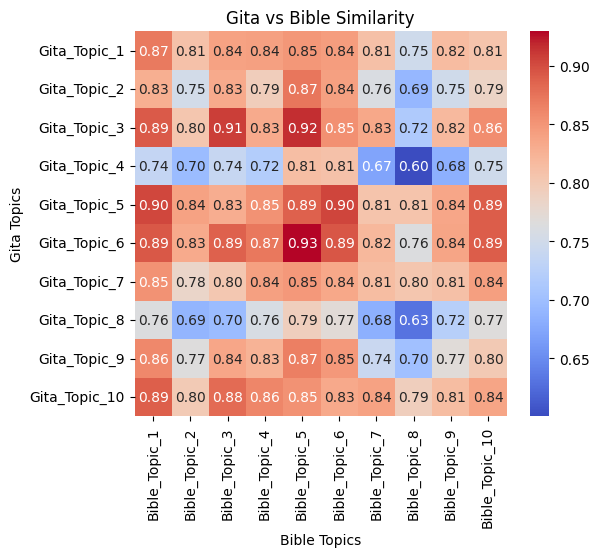

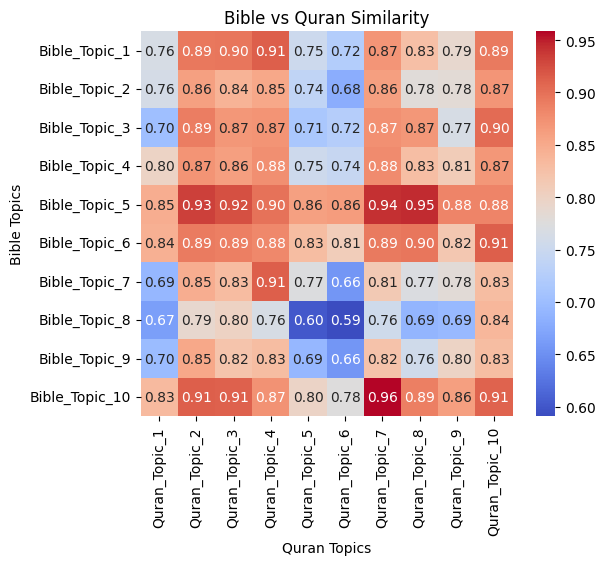

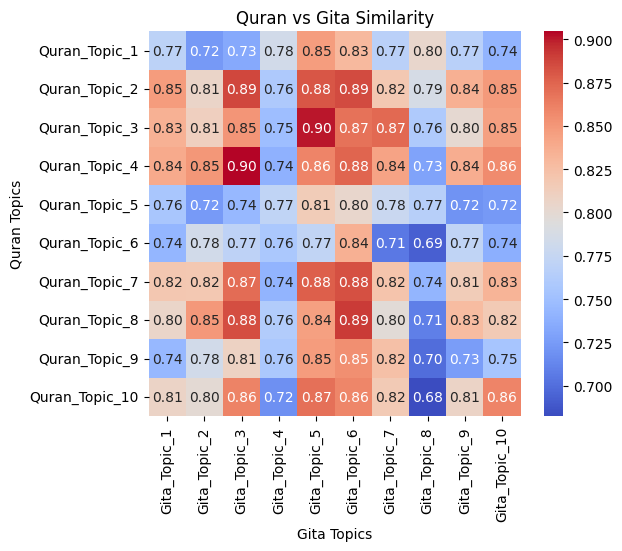

Gita Topics
Topic 1: ['arjuna', 'mind', 'world', 'krishna', 'great', 'attain', 'self', 'work', 'thus', 'body']
Topic 2: ['action', 'worship', 'among', 'path', 'self', 'know', 'attachment', 'yoga', 'wisdom', 'desire']
Topic 3: ['sense', 'mind', 'without', 'free', 'even', 'good', 'meditation', 'offer', 'action', 'evil']
Topic 4: ['arjuna', 'attain', 'brahman', 'desire', 'path', 'knowledge', 'krishna', 'time', 'remember', 'pleasure']
Topic 5: ['arjuna', 'among', 'krishna', 'path', 'time', 'death', 'seek', 'god', 'know', 'life']
Topic 6: ['life', 'arjuna', 'spiritual', 'even', 'wisdom', 'free', 'offer', 'every', 'action', 'god']
Topic 7: ['arjuna', 'world', 'among', 'creature', 'three', 'krishna', 'describe', 'listen', 'divine', 'every']
Topic 8: ['arjuna', 'supreme', 'creature', 'krishna', 'goal', 'attain', 'lord', 'self', 'wise', 'action']
Topic 9: ['supreme', 'self', 'within', 'lord', 'without', 'desire', 'free', 'selfish', 'attachment', 'knowledge']
Topic 10: ['every', 'selfless', 'bod

<Figure size 640x480 with 0 Axes>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Function to load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load GloVe embeddings
glove_embeddings = load_glove_embeddings('/kaggle/input/glove-1000d/glove.6B.100d.txt')

# Function to get the average embedding for a topic
def get_topic_vector(topic, embeddings):
    vectors = [embeddings[word] for word in topic if word in embeddings]
    if len(vectors) == 0:
        return np.zeros(100)  # Adjust this based on the embedding dimension
    return np.mean(vectors, axis=0)

# Create topic vectors for Gita, Bible, and Quran
gita_topic_vectors = [get_topic_vector(topic, glove_embeddings) for topic in nested_topics_gita]
bible_topic_vectors = [get_topic_vector(topic, glove_embeddings) for topic in nested_topics_bible]
quran_topic_vectors = [get_topic_vector(topic, glove_embeddings) for topic in nested_topics_quran]

# Compute cosine similarity matrices
gita_bible_similarity = cosine_similarity(gita_topic_vectors, bible_topic_vectors)
bible_quran_similarity = cosine_similarity(bible_topic_vectors, quran_topic_vectors)
quran_gita_similarity = cosine_similarity(quran_topic_vectors, gita_topic_vectors)

# Create DataFrames for the similarity matrices
gita_bible_df = pd.DataFrame(gita_bible_similarity,
                              index=[f'Gita_Topic_{i+1}' for i in range(len(gita_topic_vectors))],
                              columns=[f'Bible_Topic_{i+1}' for i in range(len(bible_topic_vectors))])

bible_quran_df = pd.DataFrame(bible_quran_similarity,
                               index=[f'Bible_Topic_{i+1}' for i in range(len(bible_topic_vectors))],
                               columns=[f'Quran_Topic_{i+1}' for i in range(len(quran_topic_vectors))])

quran_gita_df = pd.DataFrame(quran_gita_similarity,
                              index=[f'Quran_Topic_{i+1}' for i in range(len(quran_topic_vectors))],
                              columns=[f'Gita_Topic_{i+1}' for i in range(len(gita_topic_vectors))])

# Plot heatmaps separately

# Gita vs Bible heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(gita_bible_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Gita vs Bible Similarity")
plt.xlabel("Bible Topics")
plt.ylabel("Gita Topics")
plt.show()

# Bible vs Quran heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(bible_quran_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Bible vs Quran Similarity")
plt.xlabel("Quran Topics")
plt.ylabel("Bible Topics")
plt.show()

# Quran vs Gita heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(quran_gita_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Quran vs Gita Similarity")
plt.xlabel("Gita Topics")
plt.ylabel("Quran Topics")
plt.show()

# Optionally, save the heatmaps to files
plt.savefig('topic_similarity_heatmaps.png')

print("Gita Topics")
# Get topics with their associated words
topics_words = lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic
nested_topics_gita = []
for topic in topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_gita.append(topic_words)

# Display the nested list of words in each topic
for i, topic_words in enumerate(nested_topics_gita):
    print(f"Topic {i+1}: {topic_words}")

print("Bible Topics")

# Get topics with their associated words for the Bible dataset
bible_topics_words = bible_lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic for the Bible dataset
nested_topics_bible = []
for topic in bible_topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_bible.append(topic_words)

# Display the nested list of words in each topic for the Bible dataset
for i, topic_words in enumerate(nested_topics_bible):
    print(f"Topic {i+1}: {topic_words}")

print("Quran Topics")

# Get topics with their associated words for the Quran dataset
quran_topics_words = quran_lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic for the Quran dataset
nested_topics_quran = []
for topic in quran_topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_quran.append(topic_words)

# Display the nested list of words in each topic for the Quran dataset
for i, topic_words in enumerate(nested_topics_quran):
    print(f"Topic {i+1}: {topic_words}")



In [44]:
!pip install sentence-transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## SBERT + Cos-sim

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

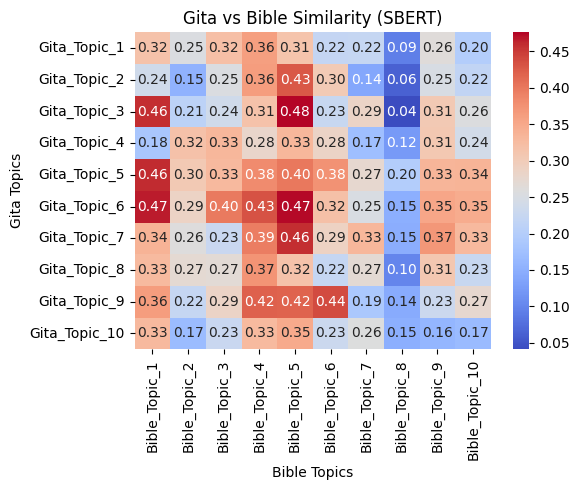

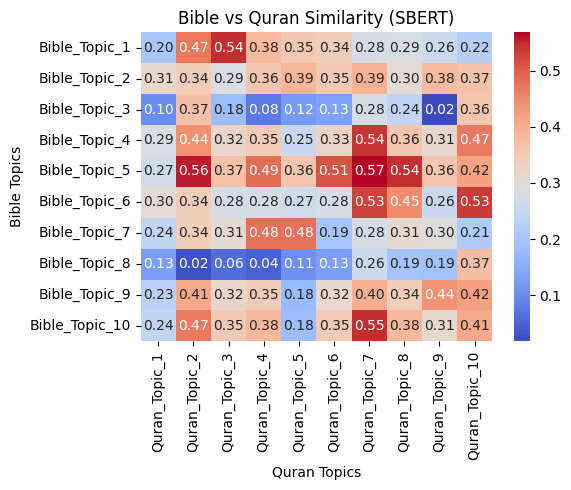

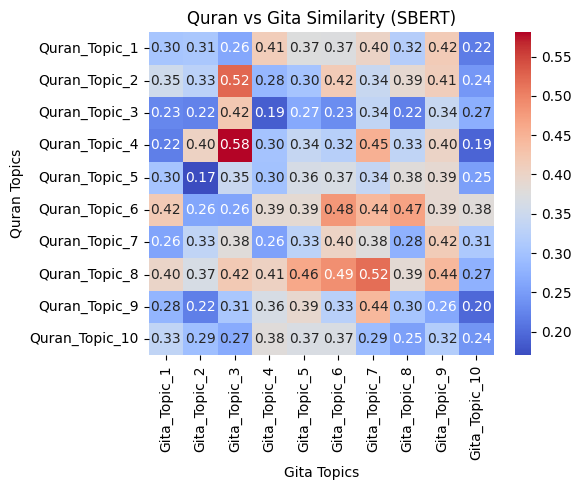

Gita Topics
Topic 1: ['arjuna', 'mind', 'world', 'krishna', 'great', 'attain', 'self', 'work', 'thus', 'body']
Topic 2: ['action', 'worship', 'among', 'path', 'self', 'know', 'attachment', 'yoga', 'wisdom', 'desire']
Topic 3: ['sense', 'mind', 'without', 'free', 'even', 'good', 'meditation', 'offer', 'action', 'evil']
Topic 4: ['arjuna', 'attain', 'brahman', 'desire', 'path', 'knowledge', 'krishna', 'time', 'remember', 'pleasure']
Topic 5: ['arjuna', 'among', 'krishna', 'path', 'time', 'death', 'seek', 'god', 'know', 'life']
Topic 6: ['life', 'arjuna', 'spiritual', 'even', 'wisdom', 'free', 'offer', 'every', 'action', 'god']
Topic 7: ['arjuna', 'world', 'among', 'creature', 'three', 'krishna', 'describe', 'listen', 'divine', 'every']
Topic 8: ['arjuna', 'supreme', 'creature', 'krishna', 'goal', 'attain', 'lord', 'self', 'wise', 'action']
Topic 9: ['supreme', 'self', 'within', 'lord', 'without', 'desire', 'free', 'selfish', 'attachment', 'knowledge']
Topic 10: ['every', 'selfless', 'bod

<Figure size 640x480 with 0 Axes>

In [45]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer, util
import seaborn as sns
import matplotlib.pyplot as plt

# Load SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to get topic embeddings using SBERT
def get_topic_embedding(topic):
    # Join the words into a single string and encode
    return model.encode(" ".join(topic), convert_to_tensor=True)

# Create topic embeddings for Gita, Bible, and Quran
gita_topic_embeddings = [get_topic_embedding(topic) for topic in nested_topics_gita]
bible_topic_embeddings = [get_topic_embedding(topic) for topic in nested_topics_bible]
quran_topic_embeddings = [get_topic_embedding(topic) for topic in nested_topics_quran]

# Ensure all embeddings are in tensor format
gita_topic_embeddings = torch.stack(gita_topic_embeddings)
bible_topic_embeddings = torch.stack(bible_topic_embeddings)
quran_topic_embeddings = torch.stack(quran_topic_embeddings)

# Compute cosine similarity matrices
gita_bible_similarity = util.pytorch_cos_sim(gita_topic_embeddings, bible_topic_embeddings)
bible_quran_similarity = util.pytorch_cos_sim(bible_topic_embeddings, quran_topic_embeddings)
quran_gita_similarity = util.pytorch_cos_sim(quran_topic_embeddings, gita_topic_embeddings)

# Convert to DataFrames for better visualization
gita_bible_df = pd.DataFrame(gita_bible_similarity.cpu().numpy(),
                              index=[f'Gita_Topic_{i+1}' for i in range(len(gita_topic_embeddings))],
                              columns=[f'Bible_Topic_{i+1}' for i in range(len(bible_topic_embeddings))])

bible_quran_df = pd.DataFrame(bible_quran_similarity.cpu().numpy(),
                               index=[f'Bible_Topic_{i+1}' for i in range(len(bible_topic_embeddings))],
                               columns=[f'Quran_Topic_{i+1}' for i in range(len(quran_topic_embeddings))])

quran_gita_df = pd.DataFrame(quran_gita_similarity.cpu().numpy(),
                              index=[f'Quran_Topic_{i+1}' for i in range(len(quran_topic_embeddings))],
                              columns=[f'Gita_Topic_{i+1}' for i in range(len(gita_topic_embeddings))])

# Plot heatmaps separately

# Gita vs Bible heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(gita_bible_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Gita vs Bible Similarity (SBERT)")
plt.xlabel("Bible Topics")
plt.ylabel("Gita Topics")
plt.tight_layout()
plt.show()

# Bible vs Quran heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(bible_quran_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Bible vs Quran Similarity (SBERT)")
plt.xlabel("Quran Topics")
plt.ylabel("Bible Topics")
plt.tight_layout()
plt.show()

# Quran vs Gita heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(quran_gita_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Quran vs Gita Similarity (SBERT)")
plt.xlabel("Gita Topics")
plt.ylabel("Quran Topics")
plt.tight_layout()
plt.show()

# Optionally, save the heatmaps to files
plt.savefig('topic_similarity_heatmaps_sbert.png')

print("Gita Topics")
# Get topics with their associated words
topics_words = lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic
nested_topics_gita = []
for topic in topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_gita.append(topic_words)

# Display the nested list of words in each topic
for i, topic_words in enumerate(nested_topics_gita):
    print(f"Topic {i+1}: {topic_words}")

print("Bible Topics")

# Get topics with their associated words for the Bible dataset
bible_topics_words = bible_lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic for the Bible dataset
nested_topics_bible = []
for topic in bible_topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_bible.append(topic_words)

# Display the nested list of words in each topic for the Bible dataset
for i, topic_words in enumerate(nested_topics_bible):
    print(f"Topic {i+1}: {topic_words}")

print("Quran Topics")

# Get topics with their associated words for the Quran dataset
quran_topics_words = quran_lda_model.show_topics(num_topics=10, num_words=10, formatted=False)

# Create a nested list of words in each topic for the Quran dataset
nested_topics_quran = []
for topic in quran_topics_words:
    topic_id, words = topic
    topic_words = [word for word, _ in words]  # Extract just the words
    nested_topics_quran.append(topic_words)

# Display the nested list of words in each topic for the Quran dataset
for i, topic_words in enumerate(nested_topics_quran):
    print(f"Topic {i+1}: {topic_words}")
